<class 'pandas.core.frame.DataFrame'>
Index: 9759 entries, 1431 to 164453
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9759 non-null   object 
 1   city_or_county             9759 non-null   object 
 2   latitude                   9759 non-null   float64
 3   longitude                  9759 non-null   float64
 4   congressional_district     9681 non-null   float64
 5   min_age_participants       9759 non-null   float64
 6   avg_age_participants       9759 non-null   float64
 7   max_age_participants       9759 non-null   float64
 8   n_participants_child       8968 non-null   float64
 9   n_participants_teen        8968 non-null   float64
 10  n_participants_adult       8968 non-null   float64
 11  n_males                    9210 non-null   float64
 12  n_females                  9210 non-null   float64
 13  n_killed                   9759 non-null   int64

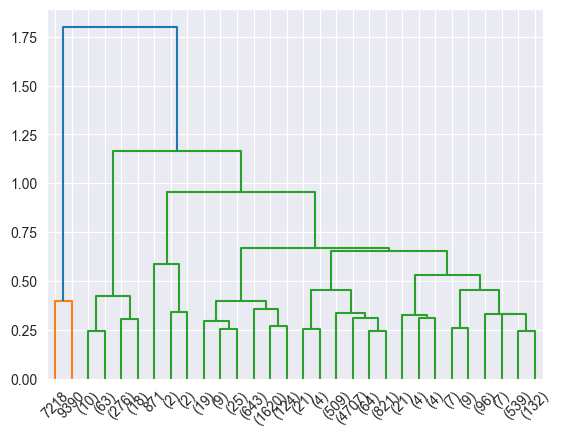

In [90]:
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pylab
import matplotlib.patches

import matplotlib.pyplot as plt

#from spicy.spatial.distance import plist
from scipy.spatial.distance import pdist, squareform

#from spicy.stats import mode
from scipy.stats import mode

#from spicy.cluster.hierarchy import linkage, dendogram
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv("../data/extracted_features.csv", low_memory=False)

Texas = df[df['state'] == "Texas"]

Texas.info()

#selezione feature
selected_features = ['n_participants', 'n_involved', 'age_to_average', 'par_to_tot']
df_aux = Texas[selected_features]

#Normalization
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df_aux.to_numpy())
ndf = pd.DataFrame(df_norm, columns=df_aux.columns)

#fine

data_dist = pdist(df_norm, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.2, truncate_mode='lastp')

In [91]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
cluster.fit_predict(df_norm)
print(silhouette_score(df_norm, cluster.labels_))

0.8937616718981689


In [92]:
ndf['label'] = cluster.labels_

ndf.label.value_counts()

label
0    9757
1       2
Name: count, dtype: int64

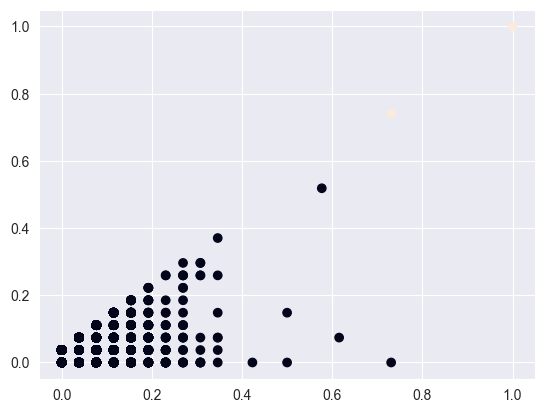

In [93]:
plt.scatter(ndf['n_participants'], ndf['n_involved'], c=cluster.labels_)

In [94]:
values = df_aux['n_involved'].value_counts()
print(values)

n_involved
1     5576
0     2736
2     1111
3      224
4       74
5       17
7        8
6        6
8        3
14       1
27       1
10       1
20       1
Name: count, dtype: int64


In [95]:
outliers_row = df_aux[df_aux['n_involved'] >= 20]
print(outliers_row)

        n_participants  n_involved  age_to_average  par_to_tot
93397             27.0          27        1.390964    0.087948
150261            20.0          20        1.225373    0.077220


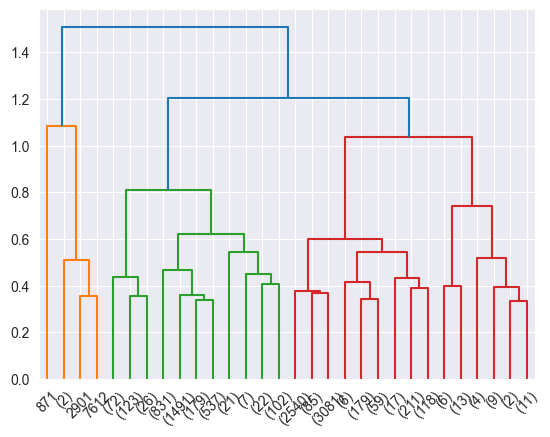

In [96]:
df_nout = df_aux.drop([93397, 150261])

#Normalization
scaler = MinMaxScaler()
df_norm_nout = scaler.fit_transform(df_nout.to_numpy())
ndf_nout = pd.DataFrame(df_norm_nout, columns=df_nout.columns)

#fine

data_dist = pdist(df_norm_nout, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.2, truncate_mode='lastp')

In [97]:
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
cluster.fit_predict(df_norm_nout)
print(silhouette_score(df_norm_nout, cluster.labels_))

0.2864240442306956


In [98]:
ndf_nout['label'] = cluster.labels_

ndf_nout.label.value_counts()

label
1    6341
2    3411
0       5
Name: count, dtype: int64

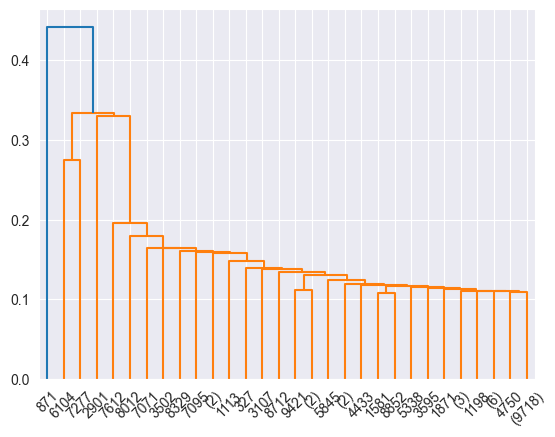

In [99]:
#data_dist = pdist(df_norm, metric = 'euclidean')
data_two_link = linkage(data_dist, method='single', metric='euclidean')
res2 = dendrogram(data_two_link, color_threshold=0.35, truncate_mode='lastp')

In [100]:
cluster2 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='single')
cluster2.fit_predict(df_norm)
print(silhouette_score(df_norm, cluster2.labels_))

0.8937616718981689


In [101]:
ndf['label'] = cluster2.labels_

ndf.label.value_counts()

label
1    9757
0       2
Name: count, dtype: int64

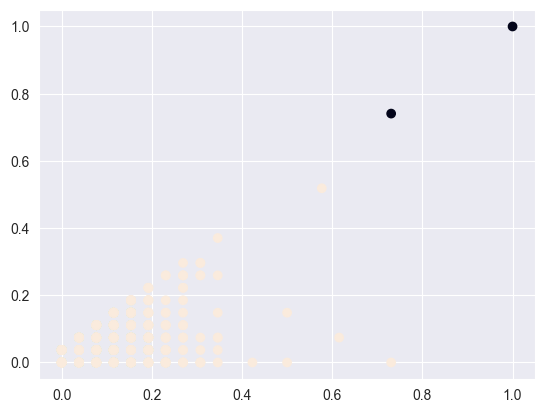

In [102]:
cluster2.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['n_involved'], c=cluster2.labels_)

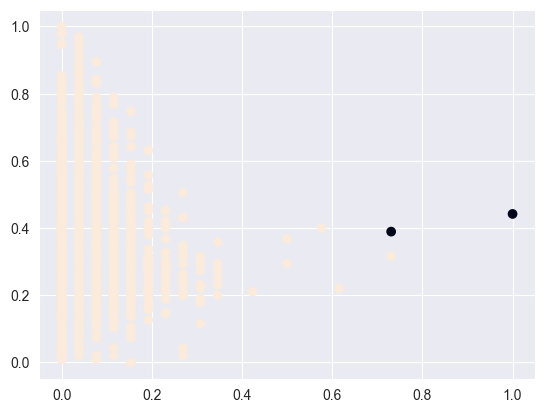

In [103]:
plt.scatter(ndf['n_participants'], ndf['age_to_average'], c=cluster2.labels_)

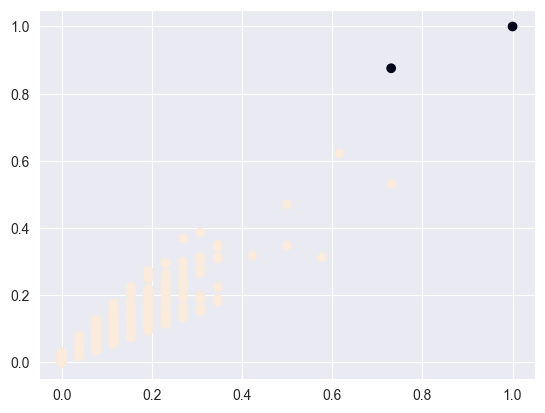

In [104]:
plt.scatter(ndf['n_participants'], ndf['par_to_tot'], c=cluster2.labels_)

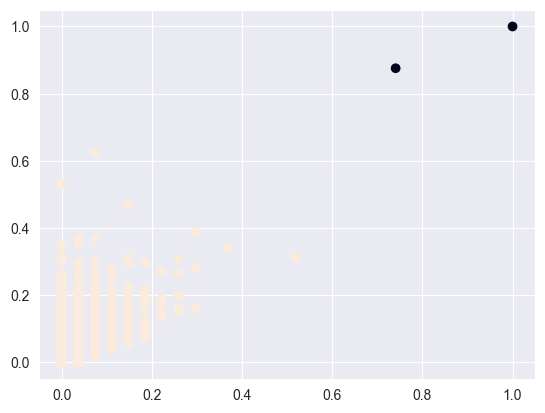

In [105]:
plt.scatter(ndf['n_involved'], ndf['par_to_tot'], c=cluster2.labels_)

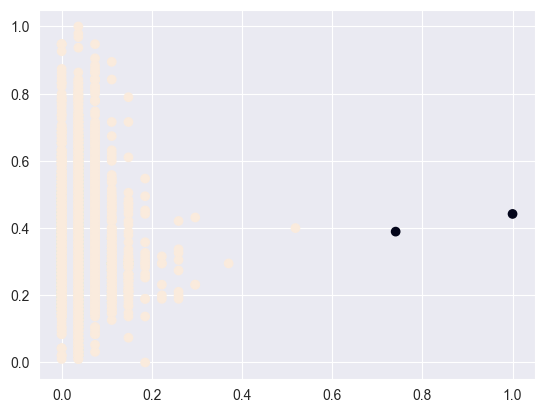

In [106]:
plt.scatter(ndf['n_involved'], ndf['age_to_average'], c=cluster2.labels_)

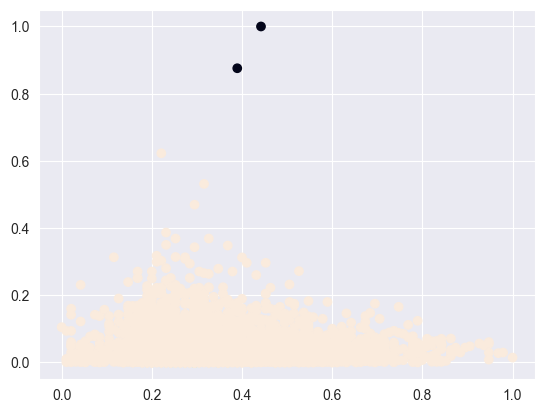

In [107]:
plt.scatter(ndf['age_to_average'], ndf['par_to_tot'], c=cluster2.labels_)

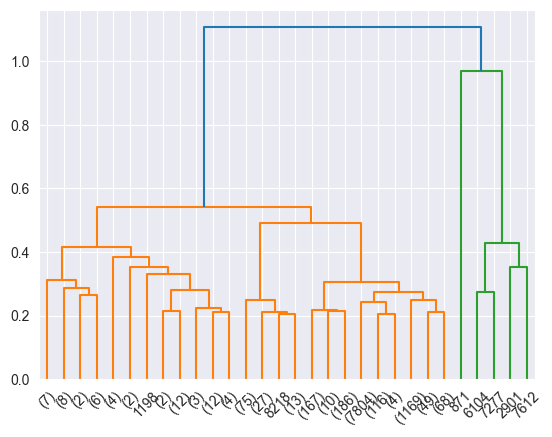

In [108]:
data_link_three = linkage(data_dist, method='average', metric='euclidean')
res3 = dendrogram(data_link_three, color_threshold=1.0, truncate_mode='lastp')

In [109]:
cluster3 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')
cluster3.fit_predict(df_norm)
print(silhouette_score(df_norm, cluster3.labels_))

0.8937616718981689


In [110]:
ndf['label'] = cluster3.labels_

ndf.label.value_counts()

label
0    9757
1       2
Name: count, dtype: int64

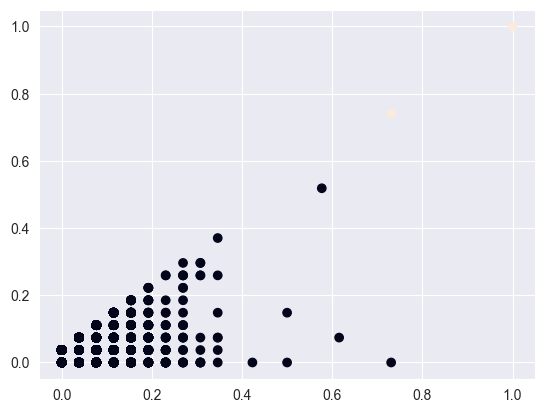

In [111]:
cluster3.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['n_involved'], c=cluster3.labels_)

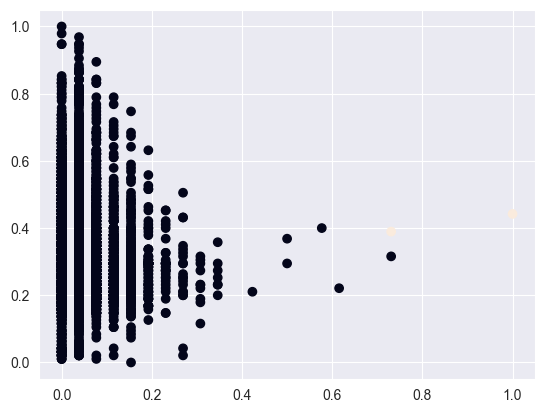

In [112]:
cluster3.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['age_to_average'], c=cluster3.labels_)

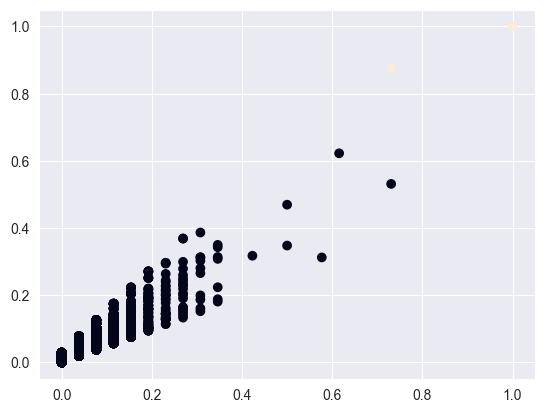

In [113]:
cluster3.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['par_to_tot'], c=cluster3.labels_)

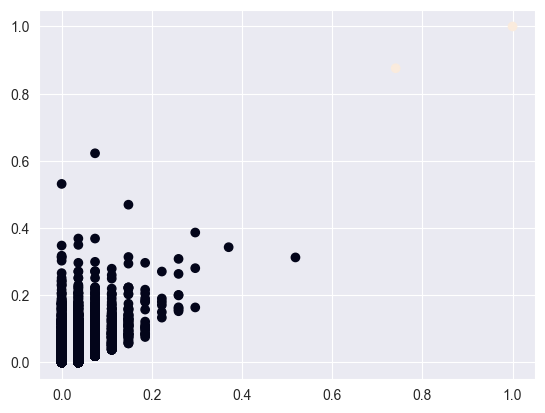

In [114]:
cluster3.fit_predict(df_norm)
plt.scatter(ndf['n_involved'], ndf['par_to_tot'], c=cluster3.labels_)

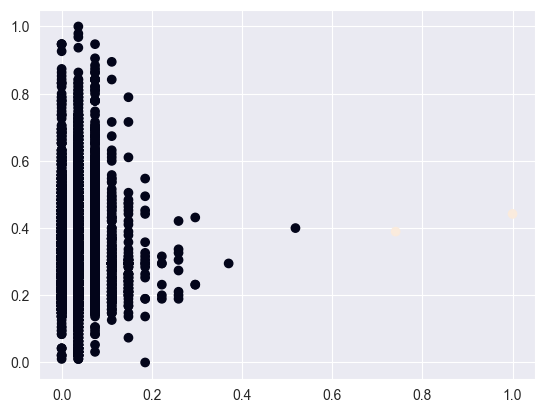

In [115]:
cluster3.fit_predict(df_norm)
plt.scatter(ndf['n_involved'], ndf['age_to_average'], c=cluster3.labels_)

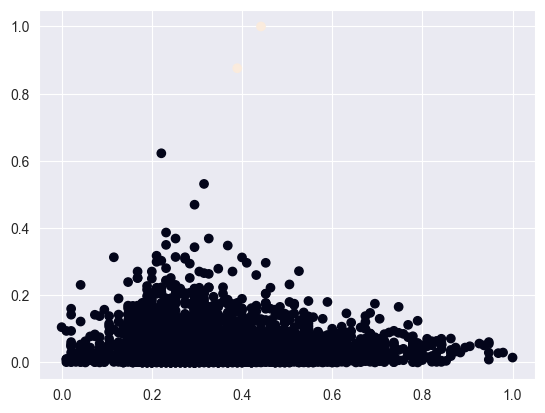

In [116]:
cluster3.fit_predict(df_norm)
plt.scatter(ndf['age_to_average'], ndf['par_to_tot'], c=cluster3.labels_)

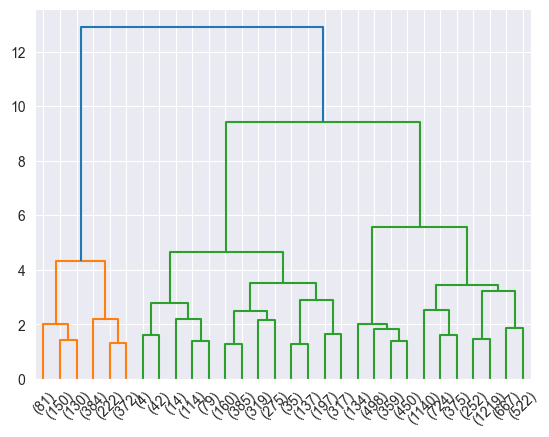

In [117]:
data_link_four = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link_four, color_threshold=10.0, truncate_mode='lastp')

In [118]:
cluster4 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster4.fit_predict(df_norm)
print(silhouette_score(df_norm, cluster4.labels_))

0.5252010649166791


In [119]:
ndf['label'] = cluster4.labels_

ndf.label.value_counts()

label
0    7971
1    1788
Name: count, dtype: int64

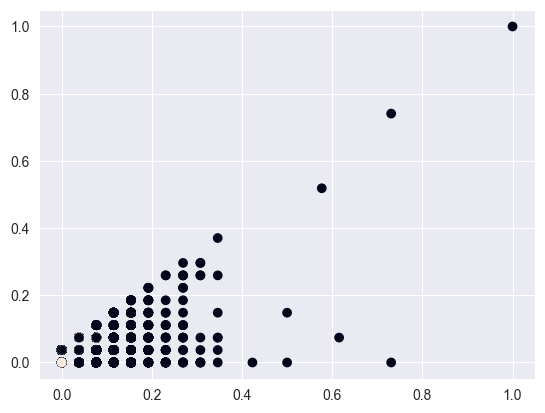

In [120]:
cluster4.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['n_involved'], c=cluster4.labels_)

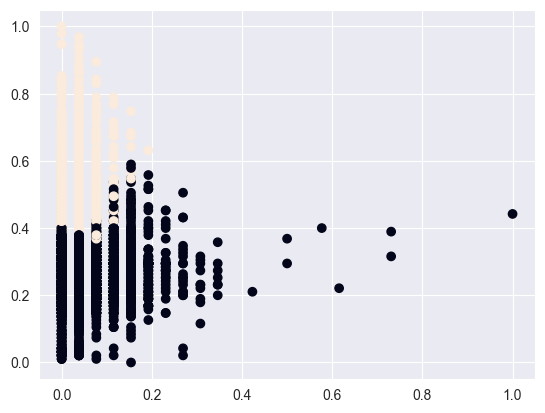

In [121]:
cluster4.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['age_to_average'], c=cluster4.labels_)

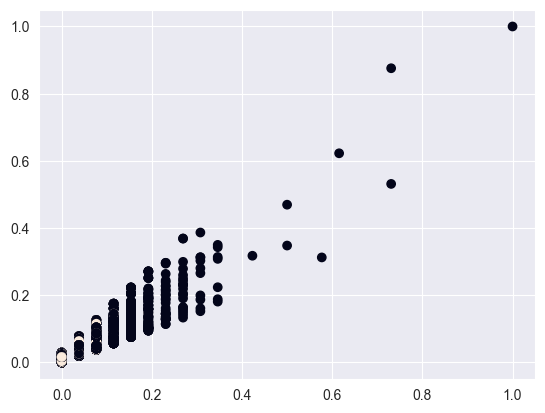

In [122]:
cluster4.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['par_to_tot'], c=cluster4.labels_)

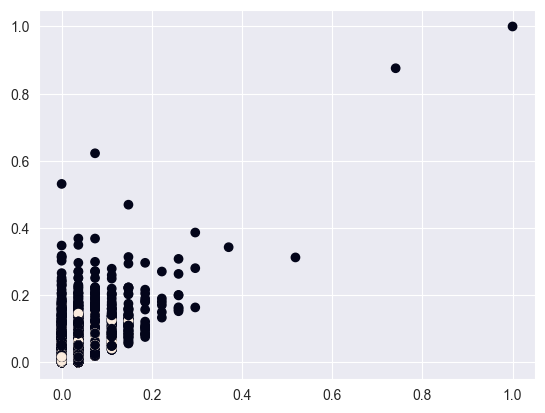

In [123]:
cluster4.fit_predict(df_norm)
plt.scatter(ndf['n_involved'], ndf['par_to_tot'], c=cluster4.labels_)

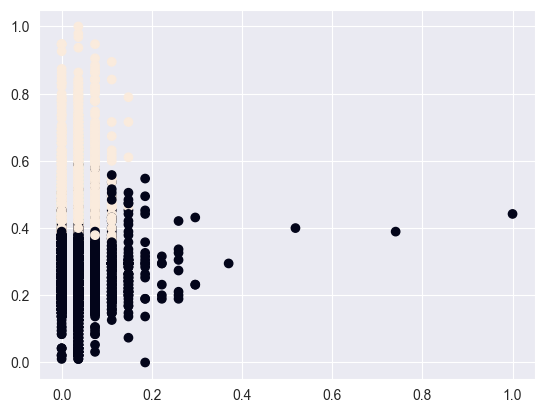

In [124]:
cluster4.fit_predict(df_norm)
plt.scatter(ndf['n_involved'], ndf['age_to_average'], c=cluster4.labels_)

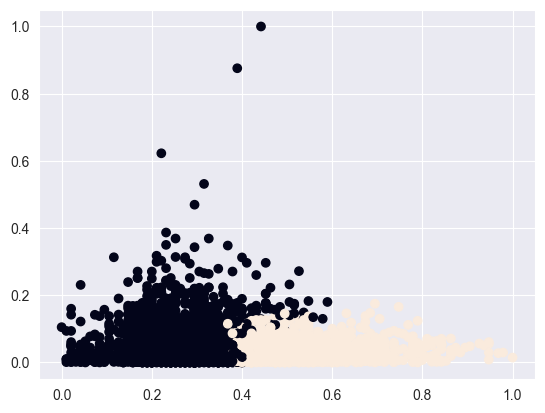

In [125]:
cluster4.fit_predict(df_norm)
plt.scatter(ndf['age_to_average'], ndf['par_to_tot'], c=cluster4.labels_)